# 疫情分析-地区数据

In [6]:
import numpy as np
import pandas as pd

# 导入matplotlib库中的额pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
# 让图表直接在Jupyter notebook中展示出来
%matplotlib inline

# 一个cell输出多行语句
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# pyecharts
from pyecharts.charts import Bar
from pyecharts import options as opts
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType

plt.style.use('seaborn-whitegrid')
sns.set_style("white")
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          # 解决负号无法正常显示的问题
          'axes.unicode_minus': False,
          # 解决中文乱码问题
          'font.sans-serif': ['SimHei']}
plt.rcParams.update(params)
# 默认设置下matplotlib做出来的图标不是很清晰，可以将图表设置成矢量格式显示
%config InlineBackend.figure_format = 'svg'

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.1.1
0.9.0


continentName                               欧洲
continentEnglishName                    Europe
countryName                                爱尔兰
countryEnglishName                     Ireland
provinceName                               爱尔兰
provinceEnglishName                    Ireland
province_zipCode                        961003
province_confirmedCount                  13980
province_suspectedCount                      0
province_curedCount                         62
province_deadCount                         530
updateTime                 2020-04-18 11:39:16
cityName                                   NaN
cityEnglishName                            NaN
city_zipCode                               NaN
city_confirmedCount                        NaN
city_suspectedCount                        NaN
city_curedCount                            NaN
city_deadCount                             NaN
Name: 0, dtype: object

,countryName,level_1,continentName,continentEnglishName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,...,province_deadCount,updateTime,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,colors
67,比利时,17,欧洲,Europe,Belgium,比利时,Belgium,961001,36138,0.0,...,5163,2020-04-18 10:01:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
68,土耳其,12,亚洲,Asia,Turkey,土耳其,Turkey,955018,78546,0.0,...,1769,2020-04-18 10:01:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
69,伊朗,19,亚洲,Asia,Iran,伊朗,Iran,955007,79494,0.0,...,4958,2020-04-18 10:01:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
70,中国,287,亚洲,Asia,China,中国,China,951001,84180,0.0,...,4642,2020-04-18 08:41:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
71,英国,11,欧洲,Europe,United Kingdom,英国,United Kingdom,961007,108692,0.0,...,14576,2020-04-18 10:01:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
72,法国,13,欧洲,Europe,France,法国,France,961002,109252,0.0,...,18681,2020-04-18 10:01:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
73,德国,14,欧洲,Europe,Germany,德国,Germany,963003,133830,0.0,...,3868,2020-04-18 10:01:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
74,意大利,9,欧洲,Europe,Italy,意大利,Italy,965008,172434,0.0,...,22745,2020-04-18 10:01:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
75,西班牙,10,欧洲,Europe,Spain,西班牙,Spain,965015,188068,0.0,...,19478,2020-04-18 10:01:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
76,美国,2,北美洲,North America,United States of America,美国,United States of America,971002,701475,0.0,...,37054,2020-04-18 11:24:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red


<Figure size 800x1600 with 0 Axes>

[Text(0, 0.5, '国家'), Text(0.5, 0, '人数')]

([<matplotlib.axis.YTick at 0x1a1ff31d50>,
 <a list of 77 Text yticklabel objects>)

Text(0.5, 1.0, '全球现存确诊人数')

Text(21043, 0, '1043')

Text(21049, 1, '1049')

Text(21069, 2, '1069')

Text(21094, 3, '1094')

Text(21117, 4, '1117')

Text(21149, 5, '1149')

Text(21195, 6, '1195')

Text(21201, 7, '1201')

Text(21304, 8, '1304')

Text(21340, 9, '1340')

Text(21380, 10, '1380')

Text(21459, 11, '1459')

Text(21480, 12, '1480')

Text(21482, 13, '1482')

Text(21572, 14, '1572')

Text(21658, 15, '1658')

Text(21740, 16, '1740')

Text(21754, 17, '1754')

Text(21763, 18, '1763')

Text(21814, 19, '1814')

Text(22224, 20, '2224')

Text(22264, 21, '2264')

Text(22418, 22, '2418')

Text(22564, 23, '2564')

Text(22669, 24, '2669')

Text(22700, 25, '2700')

Text(22783, 26, '2783')

Text(22844, 27, '2844')

Text(23105, 28, '3105')

Text(23480, 29, '3480')

Text(23489, 30, '3489')

Text(23751, 31, '3751')

Text(23755, 32, '3755')

Text(24662, 33, '4662')

Text(24663, 34, '4663')

Text(24779, 35, '4779')

Text(25050, 36, '5050')

Text(25251, 37, '5251')

Text(25767, 38, '5767')

Text(25878, 39, '5878')

Text(25923, 40, '5923')

Text(26302, 41, '6302')

Text(26468, 42, '6468')

Text(26499, 43, '6499')

Text(26875, 44, '6875')

Text(26937, 45, '6937')

Text(27073, 46, '7073')

Text(27142, 47, '7142')

Text(27392, 48, '7392')

Text(28067, 49, '8067')

Text(28379, 50, '8379')

Text(28450, 51, '8450')

Text(29252, 52, '9252')

Text(29788, 53, '9788')

Text(30653, 54, '10653')

Text(31475, 55, '11475')

Text(32982, 56, '12982')

Text(33329, 57, '13329')

Text(33980, 58, '13980')

Text(34378, 59, '14378')

Text(34595, 60, '14595')

Text(39022, 61, '19022')

Text(46929, 62, '26929')

Text(50449, 63, '30449')

Text(51927, 64, '31927')

Text(52008, 65, '32008')

Text(54221, 66, '34221')

Text(56138, 67, '36138')

Text(98546, 68, '78546')

Text(99494, 69, '79494')

Text(104180, 70, '84180')

Text(128692, 71, '108692')

Text(129252, 72, '109252')

Text(153830, 73, '133830')

Text(192434, 74, '172434')

Text(208068, 75, '188068')

Text(721475, 76, '701475')

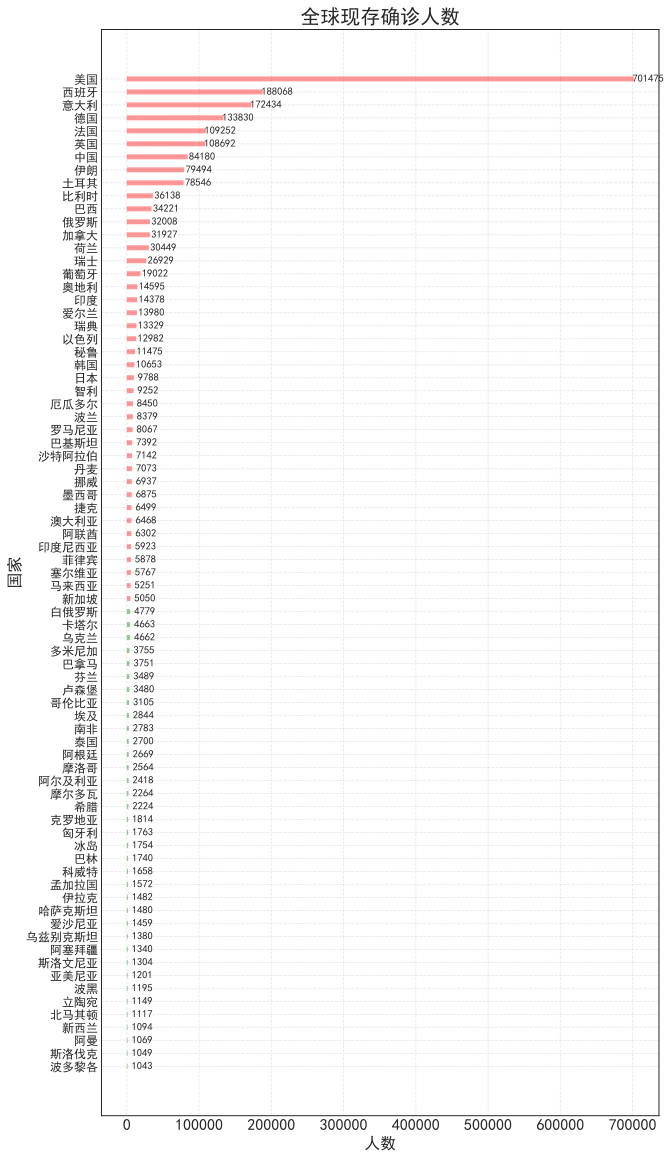

In [7]:
# Prepare Data
df = pd.read_csv('data/csv/DXYArea.csv', encoding='utf8')
df.loc[0]
# 过滤数据
df = df[(df['province_confirmedCount'] > 1000) & (df['countryName'] == df['provinceName'])]
# 1. 分组拆分
# df = df.groupby('countryName')[['province_confirmedCount']].max()

# 2. 分组-应用-拆分
def topNotZero(df):
#     return df.sort_values(by=['updateTime', 'province_confirmedCount'], ascending=False)
    return df[(df['updateTime'] == df['updateTime'].max()) & (df['province_confirmedCount'] == df['province_confirmedCount'].max())]
df = df.groupby('countryName').apply(topNotZero)

df['colors'] = ['green' if x < 5000 else 'red' for x in df['province_confirmedCount']]
df.sort_values('province_confirmedCount', ascending=True, inplace=True)
df.drop('countryName', axis=1, inplace=True)
df.reset_index(inplace=True)
df.tail(10)

# Draw plot
plt.figure(figsize=(10,20), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df['province_confirmedCount'], color=df['colors'], alpha=0.4, linewidth=5)

# Decorations
# gca：当前的子图；gcf：当前图表figure
plt.gca().set(ylabel='国家', xlabel='人数')
plt.yticks(df.index, df['countryName'], fontsize=12)
plt.title('全球现存确诊人数', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
for x, y in zip(df['province_confirmedCount'], df.index):
    plt.text(x+20000, y, str(x), ha='center', va='center', fontsize=10.5)
plt.show()

In [8]:
from pyecharts import options as opts
from pyecharts.charts import Bar

b = Bar(dict(height="900px"))
b.add_xaxis(list(df['countryName']))
b.add_yaxis("现存确诊人数", list(df['province_confirmedCount']))
b.reversal_axis()
b.set_series_opts(label_opts=opts.LabelOpts(position="right"))
b.set_global_opts(title_opts=opts.TitleOpts(title="全球现存确诊人数", pos_top="top"),
                  legend_opts=opts.LegendOpts(is_show=False))
b.render_notebook()

In [9]:
from pyecharts import options as opts
from pyecharts.charts import Map

# Prepare Data
df = pd.read_csv('data/csv/DXYArea.csv', encoding='utf8')
# 过滤数据
df = df[df['countryName'] == df['provinceName']]
# 分组-应用-拆分
def topNotZero(df):
    return df[(df['updateTime'] == df['updateTime'].max()) & (df['province_confirmedCount'] == df['province_confirmedCount'].max())]
df = df.groupby('countryName').apply(topNotZero)

df.sort_values('province_confirmedCount', ascending=True, inplace=True)
df.drop('countryName', axis=1, inplace=True)
df.reset_index(inplace=True)

# 绘图
m = Map()
m.add("现存确诊人数", [list(z) for z in zip(list(df['countryEnglishName']), list(df['province_confirmedCount']))],
      "world", name_map={'United States': 'United States of America'})
m.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
m.set_global_opts(
    title_opts=opts.TitleOpts(title="全球疫情地图"),
    visualmap_opts=opts.VisualMapOpts(max_=800000,
                                      is_piecewise=True,
#                                       range_size=[100, 1000, 5000, 10000, 50000],
                                      range_color=['#fcefda', '#f8d3a6', '#ef8c6c', '#d5564e', '#b92b23', '#8f1f19'],
#                                       range_text=['1-99人', '100-999人', '1000-4999人', '5000-9999人', '10000-49999人', '50000人及以上'],
                                      pieces=[
                                          {'max': 100},
                                          {'max': 1000},
                                          {'max': 5000},
                                          {'max': 10000},
                                          {'max': 50000},
                                          {'min': 50000}
                                      ]),
    legend_opts=opts.LegendOpts(is_show=False)
)
# m.render('COVID-19-world.html')
m.render_notebook()